In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy import stats
import time
import random
import itertools
from tabulate import tabulate


In [3]:
def erdos(n, p):
    #input:
    #n: number of nodes
    #p: probability of an edge to exist
    
    #output:
    #G: graph that is created through Erdos–Renyi model
    
    #create the graph
    G = nx.empty_graph(n)
    
    #possible edges
    ed = list(itertools.combinations(range(n), 2))
    
    for i in range(len(ed)):
        if random.random() < p:
            G.add_edge(*ed[i])
    return(G)

def barabasi_albert(n , l):
    #input:
    #n: number of nodes
    #l: number of neighbors that a newly arrived node comes with
    
    #output:
    #G: graph that is created through Barabasi–Albert model
    G = nx.Graph(Name = "Barabasi")
    G.add_node(1)
    G.add_node(2)
    G.add_edge(1,2)
    degree = G.degree()
    for i in range(3, n + 1):
        node_measures = dict(G.nodes())
        for node in node_measures:
            node_measures[node] = degree[node]
        a = np.array(list(node_measures.values()))
        prob = a / sum(a)
        nodes = np.array(list(G.nodes()))
        G.add_node(i)
        custm = stats.rv_discrete(name='custm', values=(nodes, prob))
        R = list(set(custm.rvs(size = l)))
        for j in R:
            G.add_edge(i,j)
    return(G)

def my_model(n , l, p):
    G = nx.Graph(Name = "Michele")
    G.add_node(1)
    G.add_node(2)
    G.add_edge(1,2)
    degree = G.degree()
    for i in range(3, n + 1):
        node_measures = dict(G.nodes())
        for node in node_measures:
            node_measures[node] = degree[node]
        a = np.array(list(node_measures.values()))
        nodes = np.array(list(G.nodes()))
        if random.random() < p:
            prob = a / sum(a)
        else:
            prob = np.array([1]*len(G)) / len(G)
        G.add_node(i)
        custm = stats.rv_discrete(name='custm', values=(nodes, prob))
        R = list(set(custm.rvs(size = l)))
        for j in R:
            G.add_edge(i,j)
    return(G)
        
    

def measure(grafo):
    #input:
    #grafo: graph
    
    #output:
    #node_measures: a dictionary that has as keys the nodes and as values the degree for each node
    #diameter: diameter of the graph
    #avg_cluster: clustering coefficient of the graph
    
    try:
        #computing the diameter of the graph
        diameter = nx.approximation.diameter(grafo)

    except:
        #if the graph is disconnected python raises an error
        #it happens just with graphs with few nodes
        diameter = math.inf
        
    #clustering coefficient of the graph, 
    e = nx.clustering(grafo)
    avg_cluster = sum(e.values())/len(e)
    
    #computing the degree for each node, like done in the lab
    degree = grafo.degree()
    node_measures = dict(grafo.nodes())
    for node in node_measures:
        node_measures[node] = degree[node]
    table = [['Information requested', 'Answers'], ['Number of nodes', len(grafo)],['Number of edges', len(grafo.edges())],
             ['Diameter', diameter], ['Clustering Coefficient', avg_cluster]]
    return(node_measures, diameter, avg_cluster, table)
    #print("The average clustering coeff: ", avg_cluster)

In [4]:
def erdos_hist(dic):  
    plt.figure(figsize=(10,6))
    plt.hist(dic.values(), bins = 30,color='darkgreen')
    plt.title("Degree distribution", fontsize= 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.show()

### Barabasi-Albert Model

In [50]:
l = [3,5,7,10,15,5,5,5]
n = [20000,20000,20000,20000,20000,40000,80000,100000]
barabasi_trial = [barabasi_albert(n[i], l[i]) for i in range(8)]


In [51]:
#l = [3,5]
#n = [1000,1000]
#barabasi_trial = [barabasi_albert(n[i], l[i]) for i in range(2)]

In [52]:
res_barabasi = []
for i in barabasi_trial:
    res_barabasi.append(measure(i))

In [53]:
diam = []
clus = []
for i in res_barabasi:
    diam.append(i[1])
    clus.append(i[2])

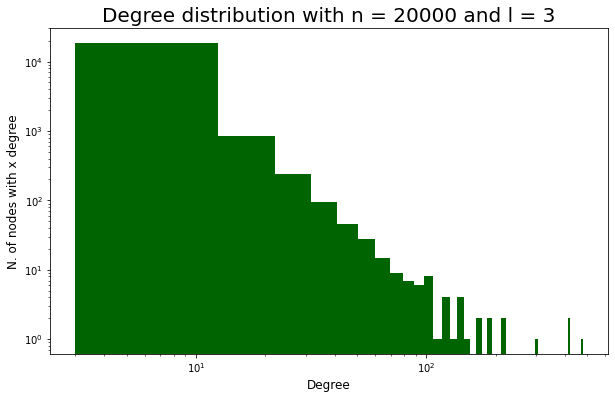

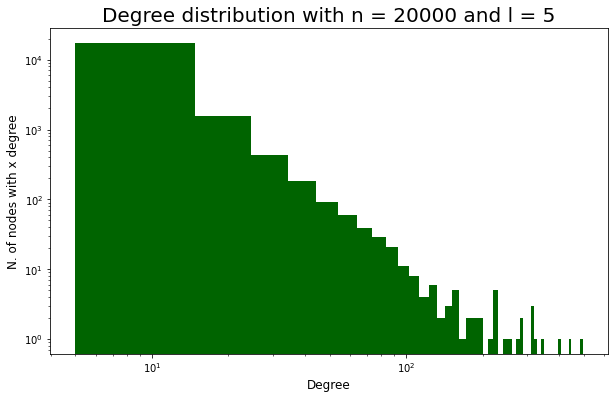

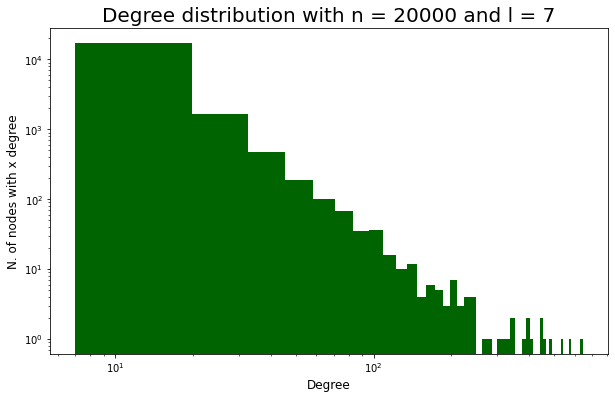

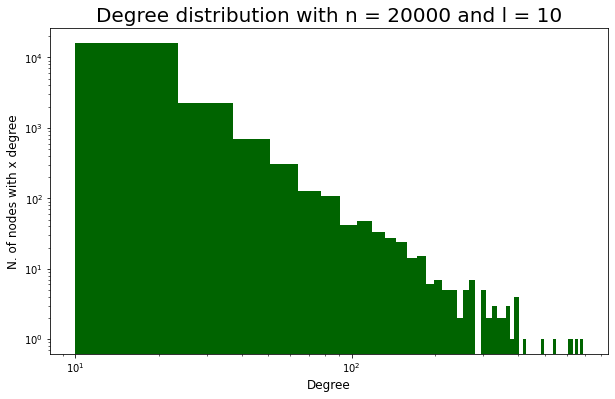

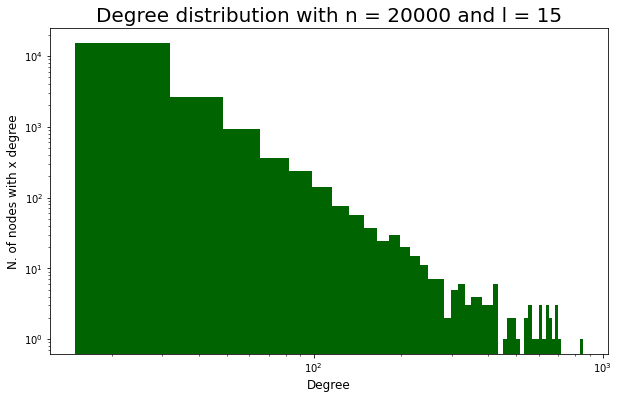

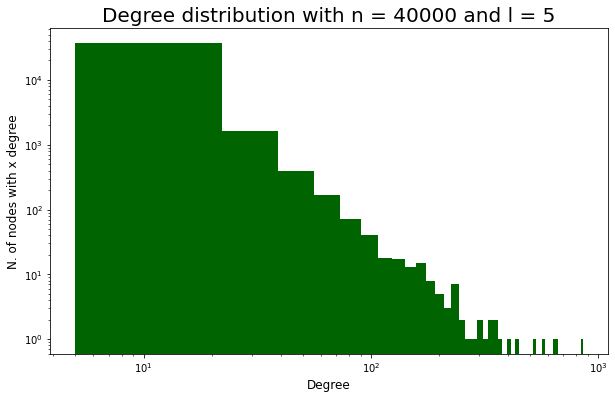

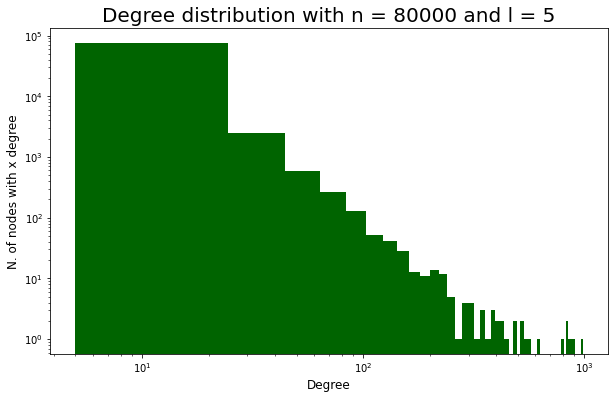

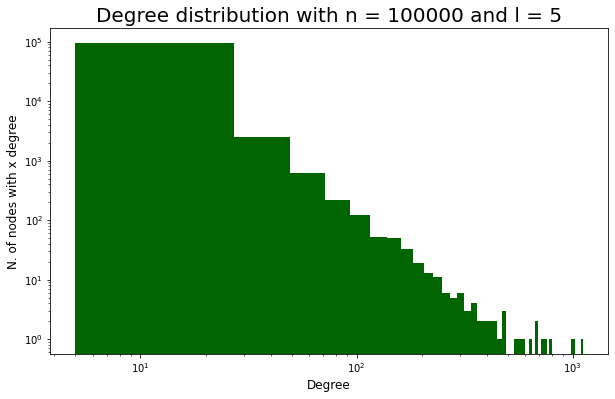

In [54]:
c=0
for i in res_barabasi:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 50, range = [l[c], max(i[0].values()) +2], color='darkgreen')
    plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    #Nodes versus their degree
    #plt.figure(figsize=(10,6))
    #plt.bar(i[0].keys(), res_barabasi[0][0].values(), color='g')
    #plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    #plt.xlabel("Node", fontsize =12)
    #plt.ylabel("Degree", fontsize = 12)
    #plt.yscale('log')
    #plt.show()
    c += 1

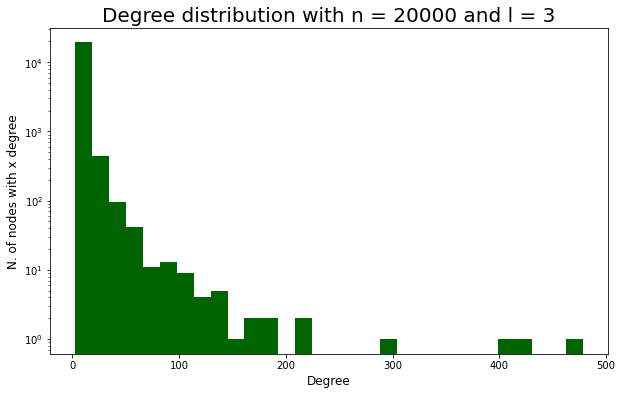

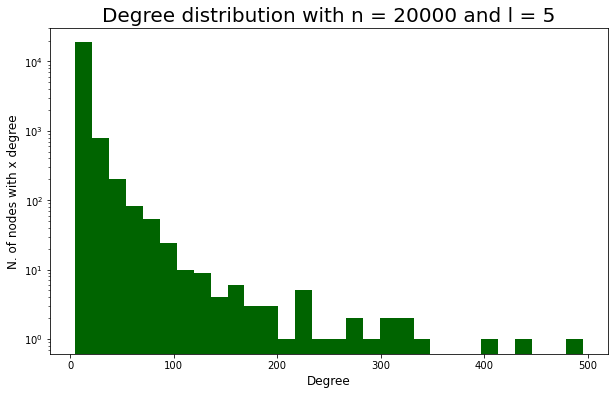

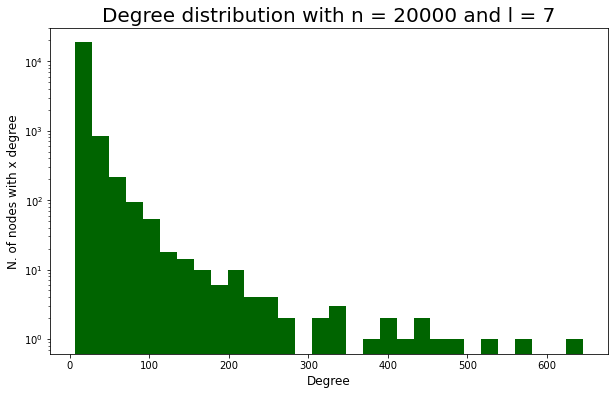

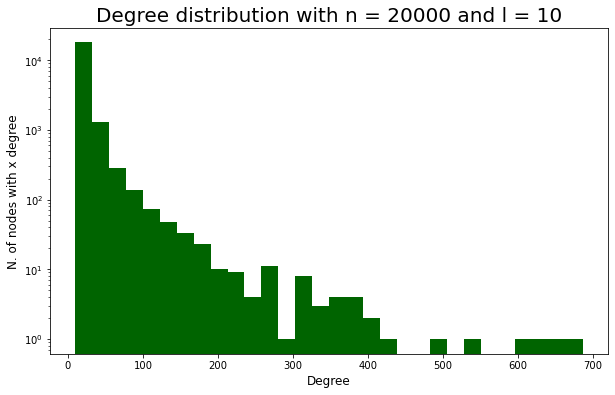

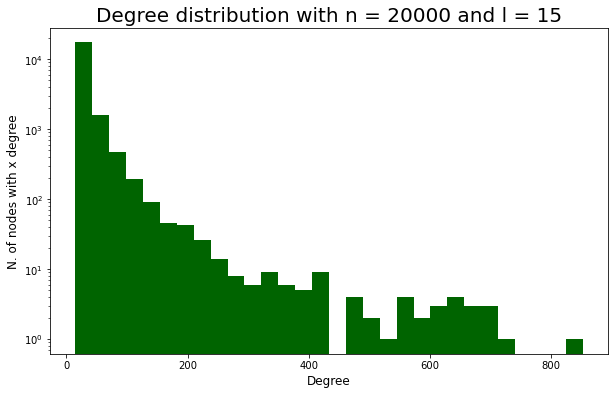

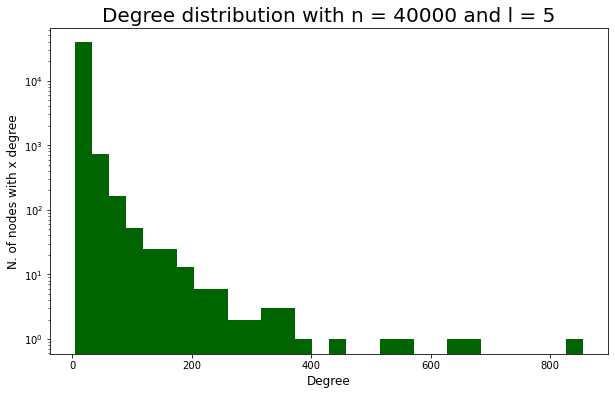

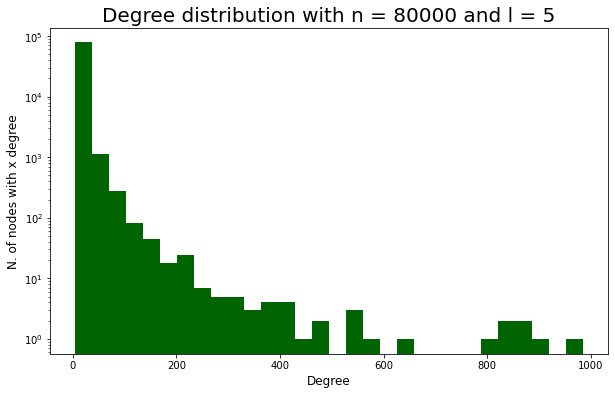

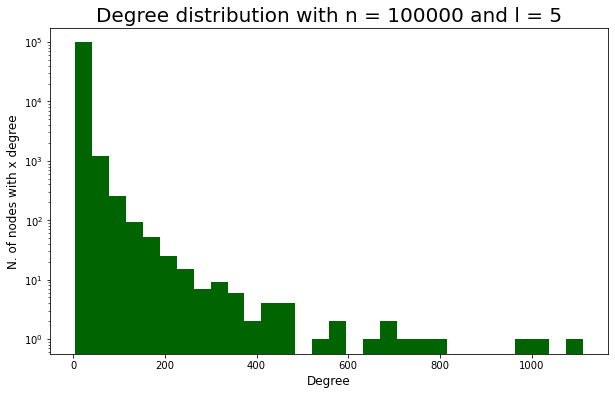

In [55]:
c=0
for i in res_barabasi:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 30, range = [l[c], max(i[0].values()) +2], color='darkgreen')
    plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    plt.show()
    c += 1

In [56]:
df = pd.DataFrame(list(zip(n, l, diam, clus)),
               columns =['Number of nodes', 'New edges at each step', 'Diameter', 'Average Cluster Coefficient'])
df

,Number of nodes,New edges at each step,Diameter,Average Cluster Coefficient
0,20000,3,7,0.003608
1,20000,5,5,0.003759
2,20000,7,5,0.005050
3,20000,10,5,0.005855
4,20000,15,4,0.008097
5,40000,5,6,0.002197
6,80000,5,6,0.001373
7,100000,5,6,0.001072


### Erdos-Renyi Model

In [4]:
p = [0.1,0.3,0.5,0.7,0.9,0.5,0.5,0.5]
n = [20000,20000,20000,20000,20000,40000,80000,100000]
erdos_trial = [erdos(n[i], p[i]) for i in range(8)]

NameError: name 'nx' is not defined

In [2]:
#p = [0.1,0.5]
#n = [500,500]
#erdos_trial = [erdos(n[i], p[i]) for i in range(2)]

In [ ]:
res_erdos = []
for i in erdos_trial:
    res_erdos.append(measure(i))

In [ ]:
diam = []
clus = []
for i in res_erdos:
    diam.append(i[1])
    clus.append(i[2])

In [ ]:
c=0
for i in res_erdos:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 30, color='darkgreen')
    plt.title(f"Degree distribution with n = "+str(n[c])+" and p = "+str(p[c]), fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    plt.show()
    #Nodes versus their degree
    #plt.figure(figsize=(10,6))
    #plt.bar(i[0].keys(), res_barabasi[0][0].values(), color='g')
    #plt.title(f"Degree distribution with n = "+str(n[c])+" and l = "+str(l[c]), fontsize = 20)
    #plt.xlabel("Node", fontsize =12)
    #plt.ylabel("Degree", fontsize = 12)
    #plt.yscale('log')
    #plt.show()
    c += 1

In [ ]:
df_1 = pd.DataFrame(list(zip(n, p, diam, clus)),
               columns =['Number of nodes', 'New edges at each step', 'Diameter', 'Average Cluster Coefficient'])
df_1

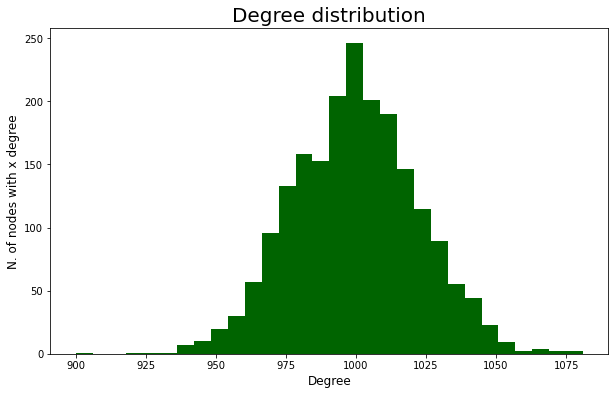

In [69]:
erdos_hist(r[0])

In [92]:
a = barabasi_albert(2000, l = 3)
#nx.info(a)
#nx.draw(a, with_labels = True)
r = measure(a)


In [93]:
print(tabulate(r[1], headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════╤══════════════╕
│ Information requested   │      Answers │
╞═════════════════════════╪══════════════╡
│ Number of nodes         │ 2000         │
├─────────────────────────┼──────────────┤
│ Number of edges         │ 5970         │
├─────────────────────────┼──────────────┤
│ Diameter                │    6         │
├─────────────────────────┼──────────────┤
│ Clustering Coefficient  │    0.0172185 │
╘═════════════════════════╧══════════════╛


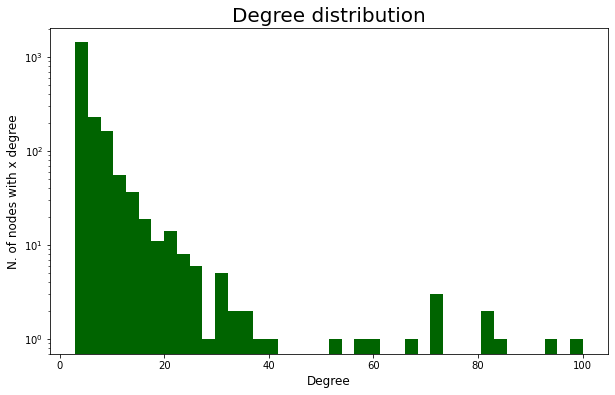

In [94]:
barabasi_hist(r[0])

## Trials

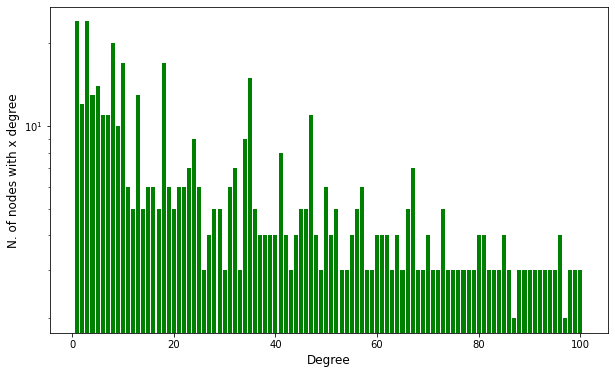

In [187]:
plt.figure(figsize=(10,6))
plt.bar(res_barabasi[0][0].keys(), res_barabasi[0][0].values(), color='g')
plt.xlabel("Degree", fontsize =12)
plt.ylabel("N. of nodes with x degree", fontsize = 12)
plt.yscale('log')
plt.show()


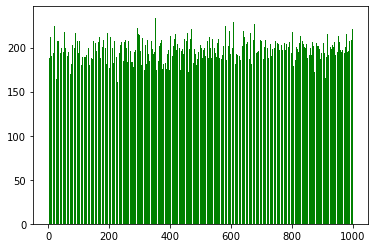

In [97]:
plt.bar(a.keys(), a.values(), color='g')
plt.show()

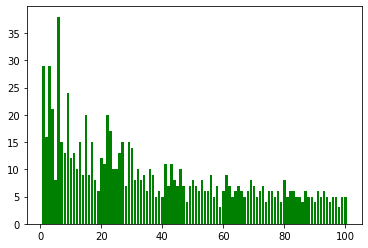

In [74]:
plt.bar(a.keys(), a.values(), color='g')
plt.show()

### SNAP library

In [34]:
deezer = pd.read_csv("deezer_europe_edges.csv", sep = ",", header = 0,index_col=False, names = ["node1","node2"])
deezer.head()

,node1,node2
0,0,14270
1,0,16976
2,0,12029
3,0,3001
4,0,14581


In [35]:
deezer = nx.from_pandas_edgelist(deezer, source ="node1", target ="node2", create_using=nx.Graph())

In [36]:
git = pd.read_csv("musae_git_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
git.head()

,node1,node2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [37]:
github = nx.from_pandas_edgelist(git, source ="node1", target ="node2", create_using=nx.Graph())

In [38]:
fb = pd.read_csv("musae_facebook_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
fb.head()

,node1,node2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [39]:
facebook = nx.from_pandas_edgelist(fb, source ="node1", target ="node2", create_using=nx.Graph())

In [40]:
fb_2 = pd.read_csv("facebook_combined.txt", sep = " ", header = None, names = ["node1", "node2"])
fb_2.head()

,node1,node2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [41]:
facebook_2 = nx.from_pandas_edgelist(fb_2, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(facebook_2)

<ipython-input-41-f766532d786a>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(facebook_2)


'Graph with 4039 nodes and 88234 edges'

In [45]:
twitch = pd.read_csv("musae_DE_edges.csv", sep = ",", header = 0, names = ["node1", "node2"])
twitch.head()


,node1,node2
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,7275


In [46]:
twitch = nx.from_pandas_edgelist(twitch, source ="node1", target ="node2", create_using=nx.Graph())
nx.info(twitch)

<ipython-input-46-d4d5da403ffe>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(twitch)


'Graph with 9498 nodes and 153138 edges'

In [47]:
real_net = [measure(deezer), measure(github), measure(facebook), measure(facebook_2), measure(twitch)]
n=[len(paper),len(github),len(facebook), len(facebook_2),len(twitch)]
edg=[len(paper.edges()),len(github.edges()),len(facebook.edges()),len(facebook_2.edges()),len(twitch.edges())]
nomi = ["Deezer", "Github", "Facebook Pages", "Facebook friends", "Twitch DE"]
real_diam = [real_net[i][1] for i in range(5)]
real_clus = [real_net[i][2] for i in range(5)]
real_df = pd.DataFrame(list(zip(nomi, n, edg, real_diam, real_clus)),
               columns =['Network','Number of nodes', 'Number of edges', 'Diameter', 'Average Cluster Coefficient'])
real_df

,Network,Number of nodes,Number of edges,Diameter,Average Cluster Coefficient
0,Deezer,9877,25998,21,0.141160
1,Github,37700,289003,11,0.167537
2,Facebook Pages,22470,171002,15,0.359738
3,Facebook friends,4039,88234,8,0.605547
4,Twitch DE,9498,153138,7,0.200886


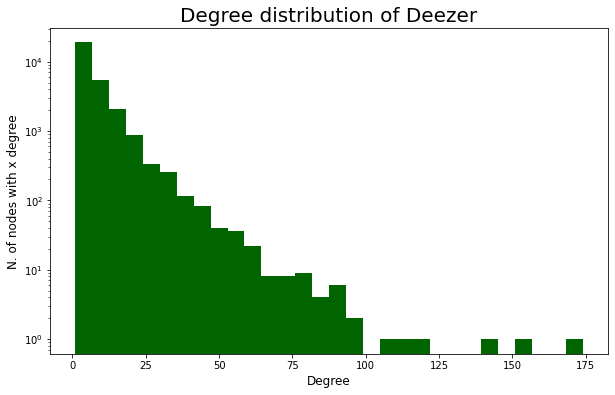

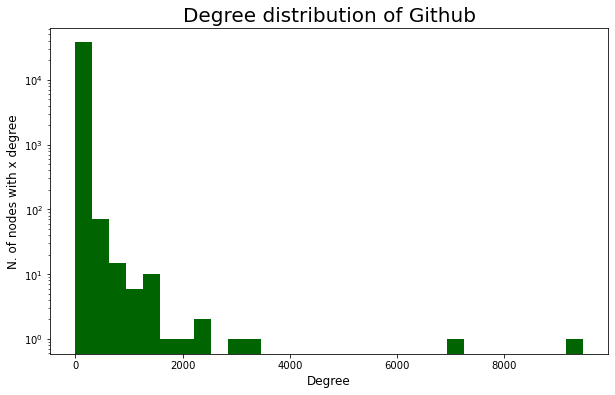

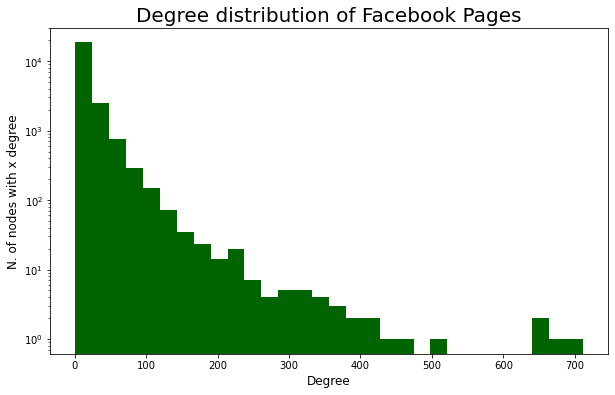

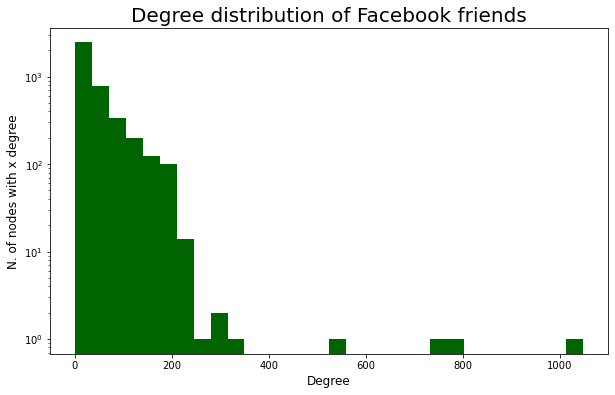

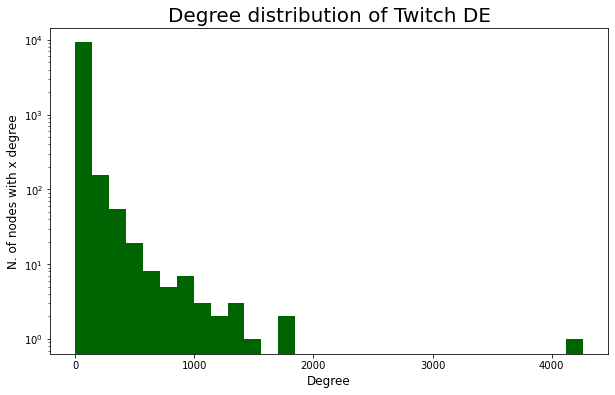

In [49]:
c=0
for i in real_net:
    plt.figure(figsize=(10,6))
    plt.hist(i[0].values(), bins = 30, range = [1, max(i[0].values()) +2], color='darkgreen')
    plt.title(f"Degree distribution of "+nomi[c], fontsize = 20)
    plt.xlabel("Degree", fontsize =12)
    plt.ylabel("N. of nodes with x degree", fontsize = 12)
    plt.yscale('log')
    plt.show()
    c +=1